In [11]:
import os
from skimage import io, measure, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_multiotsu
from skimage.color import label2rgb

In [2]:
data_dir = 'Data/1-Crown'
img_list = os.listdir(data_dir)
img_list

['11.jpg',
 '15.jpg',
 '19.jpg',
 '2.jpg',
 '24.jpg',
 '33.jpg',
 '34.jpg',
 '48.jpg',
 '6.jpg',
 '706.jpg']

In [3]:
img = [io.imread(os.path.join(data_dir, f), as_gray=True) for f in img_list]
img

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

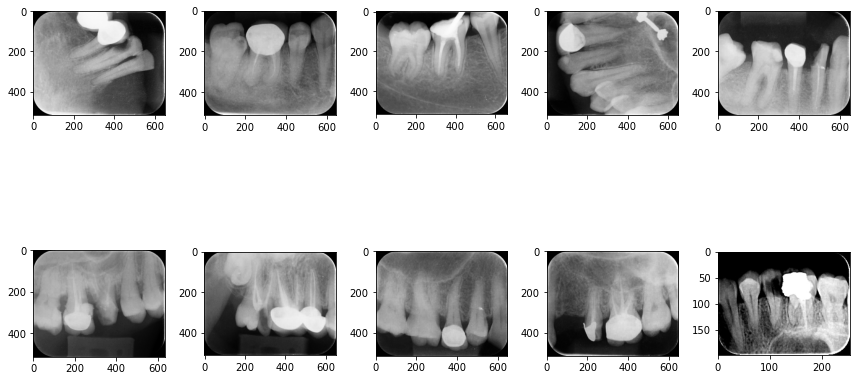

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(img)):
    axs[i].imshow(img[i], cmap='gray')
    fig.tight_layout()

In [5]:
thresholds_list = [threshold_multiotsu(thresholds) for thresholds in img] 
thresholds_list

[array([0.36523438, 0.69726562]),
 array([0.25195312, 0.54101562]),
 array([0.24023438, 0.58398438]),
 array([0.27539062, 0.59960938]),
 array([0.36523438, 0.67382812]),
 array([0.32490043, 0.58635876]),
 array([0.31054688, 0.63476562]),
 array([0.24804688, 0.49804688]),
 array([0.24023438, 0.56054688]),
 array([0.20507812, 0.59570312])]

D:\Faizan\Anaconda3\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


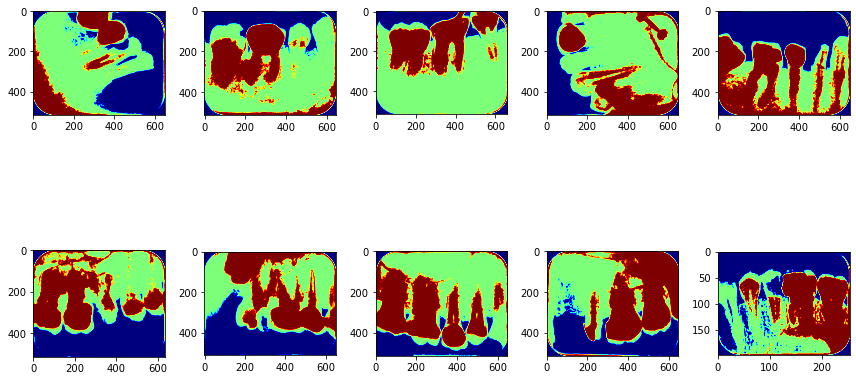

In [6]:
regions = [img_as_ubyte(np.digitize(img[i], bins=thresholds_list[i])) for i in range(len(img))]

fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(img)):
    axs[i].imshow(regions[i], cmap='jet')
    fig.tight_layout()

<ipython-input-14-88f0cde9e8de>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  label_imgs = [label2rgb(measure.label(regions[i], connectivity=img[i].ndim), image=img[i]) for i in range(len(regions))]


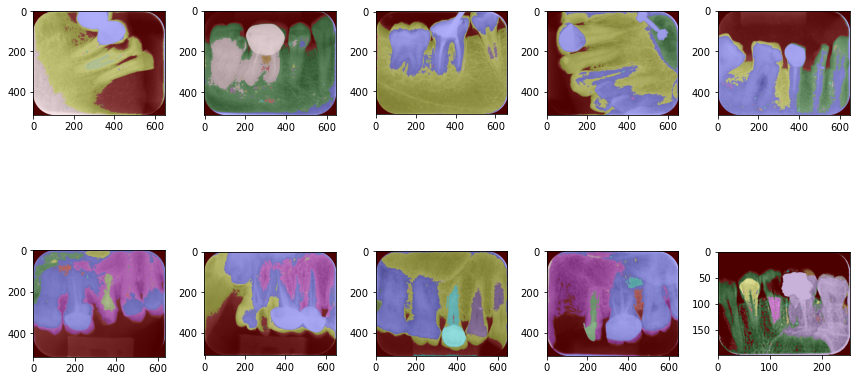

In [14]:
label_imgs = [label2rgb(measure.label(regions[i], connectivity=img[i].ndim), image=img[i]) for i in range(len(regions))]

fig, axs = plt.subplots(2, 5, figsize=(12,12))
axs = axs.ravel()
for i in range(len(img)):
    axs[i].imshow(lable_imgs[i])
    fig.tight_layout()

In [15]:
properties = ['label', 'area', 'bbox', 'bbox_area', 'centroid', 'filled_image', 'image', 
              'slice', 'inertia_tensor', 'intensity_image', 'solidity', 'mean_intensity']

props = [measure.regionprops_table(label_imgs[i], img[i], properties=properties) for i in range(len(img))]
props

TypeError: Non-integer label_image types are ambiguous